<div style="color:#483838; padding:0px 10px; border-radius:5px; font-size:18px; text-align:center"><h1 style='margin:10px 5px'>Exploratory Data Analysis (EDA)_Moments</h1>
</div>

- __01)Definitions__
- __02)1st-Moment__
- mean
- median
- mode
- __03)2st-Moment__
- variance
- Std
- mean absolute deviation and median absolute deviation
- COV

## 01)Definitions

__Moments__

- Moments are set of statistical parameters, describe a distribution. We should undrestand data clearly, before training any advanced ML model.
- We have four statistical moments for describing data. 

## 02) 1st_Moment

- First moment is used to measure the location of the central point of data.The first central moment is the expected value, known also as an expectation, mathematical expectation, mean, or average.
- In first moment `The mean/median/mode` are measurements of central tendency. They tell you where the “middle” of a data set is. Each of these statistics defines the midpoint of data differently:

__import dataset__

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('G:/Data_analyst/student_data.csv')
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
#we are going to work on grades:
df = data['G1'] + data['G2'] + data['G3']
df.head()

0    17
1    16
2    25
3    44
4    26
dtype: int64

__mean__

In [4]:
df.mean()

32.037974683544306

-The mean calculates the average of data and not exactly the center of data.Suppose we have 10 grades as bellow:

In [5]:
grade = [1,3,4,5,6,7,8,17,19,20]
grade = pd.Series(grade)
grade.mean()

9.0

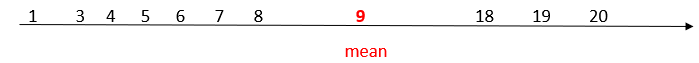

- It has been said that our goal is to calculate the centre of data, but 9 is not the centre,since there are 3 numbers in the right hand but 7 numbers in the left hand.It is the average.So it is the problem of using mean.
- For calculating the exact centre of data we use median().

__median__

In [6]:
grade.median() 

6.5

- 6.5 is exactly the centre of our data.

- in our data set:

In [7]:
df.mean()

32.037974683544306

In [8]:
df.median()

32.0

__mode__

- mode the most likely value.

In [9]:
df.mode()

0    27
dtype: int64

- Note that in order to correct mean, we can use scipy trim_mran.
- It Returns mean of array after trimming distribution from both tails.

- scipy.stats.trim_mean(a, proportiontocut, axis=0)
- proportiontocut : Fraction to cut off of both tails of the distribution.

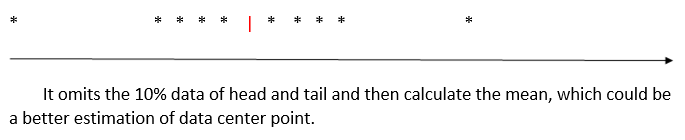

In [10]:
from scipy import stats
stats.trim_mean(df,.1)

32.25552050473186

- the median is more correct than trim_mean to find center.

## 03)2nd_moment

- In second moment we calculate Vaiance, which  represents how a set of data points are spread out around their mean value(measure of the variability ).


__Variance__

- Variance calculates the mean of our data and then sum the distances of each sample from the mean, then divide by the number of samples. The greater the variance, the greater the dispersion of the samples.

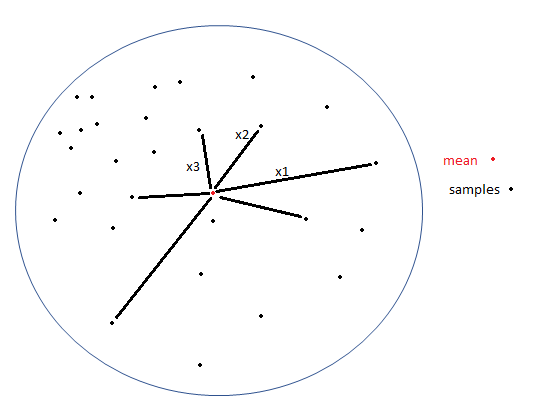

$$V_{population} = \frac{\Sigma(X- \overline{X)}^2}{N}$$

- power 2 is due to preventing negative numbers in sum.

- And for our sample the variance is:

$$V_{sample} = \frac{\Sigma(X- \overline{X)}^2}{N-1}$$

__standard Deviation__

- Suppose the unit of our examples is in meters. But our variance out put is in $m^2$ .
- To prevent this issue `Standard Deviation` has been defined.

$$\sigma = \sqrt{V}$$

- Std describes whether the data points are in close proximity or whether they are spread out to the mean.

__calculating std using pandas__

In [11]:
#we are going to work on grades:
df = data['G1'] + data['G2'] + data['G3']
df.std()

11.090356901031223

- This means that our data are on average 11 away from the average.

- let's plot our mean, median and mode.

In [12]:
mean = df.mean()
mode = df.mode()
median = df.median()

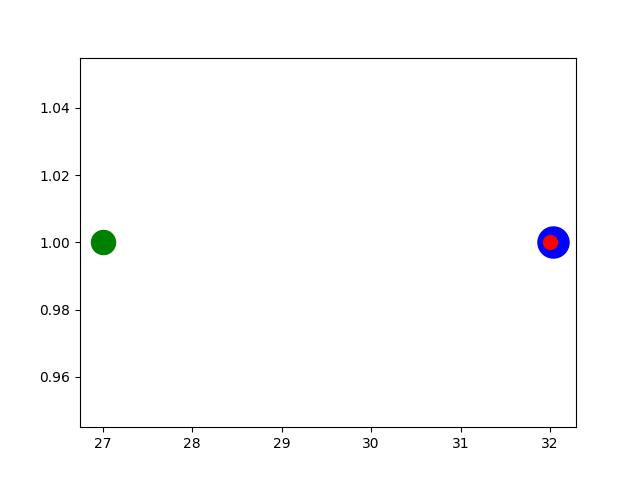

In [13]:
%matplotlib widget
plt.scatter(mean, 1, s = 500,color = 'b')
plt.scatter(median, 1, s = 100,color = 'r')
plt.scatter(mode, 1, s = 300,color = 'g')
plt.show()

In [22]:
#mean > median > mode

__`mean absolute deviation` and `median absolute deviation`__

- We also have `mean absolute deviation` and `median absolute deviation`

- They also calculate the data dispersion

__mean absolute deviation(MAD)__

- The mean absolute deviation of a dataset is the average distance between each data point and the mean. It gives us an idea about the variability in a dataset.

$$MAD = \frac{\Sigma|X_i- mean |}{N}$$

- __mean = average value of the data set__
- __$X_i$ = data values in the set__
- __N = number of data values__

__median absolute deviation(MAD)__

-  In statistics, the median absolute deviation is a measure of variability in a set of data. It is the average distance that the data values have .

$$MAD = \frac{\Sigma|X_i- median |}{N}$$

- __median = the center of the data set__
- __$X_i$ = data values in the set__
- __N = number of data values__

- NOTE that STD is a better way to calculate the dispersion of data, since in variance we have power of 2, it affects distant samples more.

__COV(coefficient of variation)__

- There is a measurement unit in std and MADs and we cannot correctly compare, for example, the currency of two countries or the grades of two different classes where the grades of one class are between 0 and 20 and the other class is between 0 and 100. For this reason, we use COV because it removes the unit of measurement.

$$COV = \frac{\sigma(std)}{mean}$$

- __COV in code:__

In [15]:
a_class = np.random.randint(0, 100, 60)
b_class = np.random.randint(0, 20, 50)

In [16]:
a_std = a_class.std()
a_mean = a_class.mean()

In [17]:
b_std = b_class.std()
b_mean = b_class.mean()

In [18]:
a_std

28.726565328203712

In [19]:
b_std

5.191685660746421

- it is clear that stds are in different range and cannot be compared. therefore we use COV.

In [20]:
a_cov = a_std / a_mean
a_cov

0.5617972358840361

In [21]:
b_cov = b_std / b_mean
b_cov

0.5150481806296052

- from covs we can undrestand that the dispersion of data are so similar and they nearly have similar distribution.